<a href="https://colab.research.google.com/github/lhbsaldana/Data-Science-Projects/blob/main/Saldana_Finals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Natural Language Processing
from sklearn.feature_extraction import _stop_words
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split

#for classification models 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

In [ ]:
#import data 
drive.mount('/content/drive')
directory = "/content/drive/MyDrive/Colab Notebooks/" 
data_news = pd.read_csv(directory + 'news.csv')
data_news.shape

In [ ]:
#data cleaning 
data_news['content'] = data_news['title']+ data_news['text']
print(data_news['content'])

data_news.drop_duplicates(subset ="content",inplace = True) #remove duplicate rows 
data_news['content']= data_news['content'].str.replace('[^\w\s]',' ') #remove punctuation
data_news['content'] = data_news['content'].str.replace('[^A-Za-z]',' ') #remove numbers
data_news['content'] = data_news['content'].str.replace('  ',' ')#transform double space to single space 
data_news['content'] = data_news['content'].str.lower() #transform to lowercase 

#data_news['label'] = data_news['label'].map({"REAL": 1, "FAKE": 0}) #tranform labels to numerical values 
data_news.shape

In [ ]:
X = data_news.content #predictor column 
Y = data_news.label #target column 

#split data into train and test data 
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state=7)

In [ ]:
#Vectorization - unique words as vectors of real numbers 
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
#Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)


In [ ]:
#MODELLING USING MULTINOMIAL NAIVE-BAYES
NB = MultinomialNB()
NB.fit(tfidf_train, y_train)
y_pred=NB.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
acc_score=accuracy_score(y_test,y_pred)
prec_score= precision_score(y_test,y_pred,pos_label='FAKE')
rec_score = recall_score(y_test,y_pred, pos_label='FAKE')
print(f'Accuracy: {round(acc_score*100,2)}%')
print(f'Precision: {round(prec_score*100,2)}%')
print(f'Recall: {round(rec_score*100,2)}%')
con_mtrx1= confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
print(con_mtrx1)

Accuracy: 83.6%
Precision: 98.72%
Recall: 69.64%
[[461 201]
 [  6 594]]


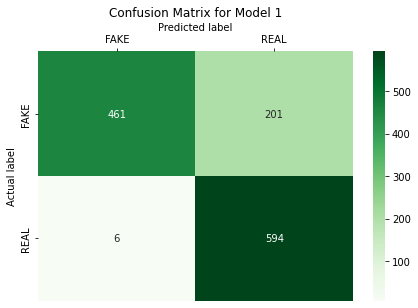

In [ ]:
#Confusion Matrix for Multinomial NB
con_mtrx1 = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
class_names=['FAKE','REAL'] 

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
sns.heatmap(pd.DataFrame(con_mtrx1), annot=True, cmap="Greens" ,fmt='g')
ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()
plt.tight_layout()
plt.title('Confusion Matrix for Model 1', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_ticklabels(['FAKE', 'REAL']);
ax.yaxis.set_ticklabels(['FAKE', 'REAL']);

In [ ]:
#MODELLING USING LOGISTIC REGRESSION 
REG = LogisticRegression()
REG.fit(tfidf_train, y_train)
y_pred=REG.predict(tfidf_test)
acc_score=accuracy_score(y_test,y_pred)
prec_score= precision_score(y_test,y_pred,pos_label='FAKE')
rec_score = recall_score(y_test,y_pred, pos_label='FAKE')
print(f'Accuracy: {round(acc_score*100,2)}%')
print(f'Precision: {round(prec_score*100,2)}%')
print(f'Recall: {round(rec_score*100,2)}%')

Accuracy: 92.08%
Precision: 90.37%
Recall: 95.02%


[[629  33]
 [ 67 533]]


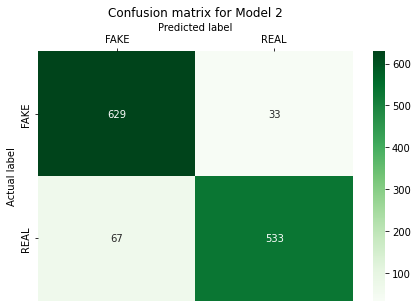

In [ ]:
#Confusion Matrix for Logistic Regression 
con_mtrx2 = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
print(con_mtrx2)
class_names=['FAKE','REAL'] 

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
sns.heatmap(pd.DataFrame(con_mtrx2), annot=True, cmap="Greens" ,fmt='g')
ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()
plt.tight_layout()
plt.title('Confusion matrix for Model 2', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_ticklabels(['FAKE', 'REAL']);
ax.yaxis.set_ticklabels(['FAKE', 'REAL']);

In [ ]:
 #MODELLING USING Passive Aggressive Classifier 
PA =PassiveAggressiveClassifier(max_iter=50)
PA.fit(tfidf_train,y_train)
y_pred=PA.predict(tfidf_test)
acc_score=accuracy_score(y_test,y_pred)
prec_score= precision_score(y_test,y_pred,pos_label='FAKE')
rec_score = recall_score(y_test,y_pred, pos_label='FAKE')
print(f'Accuracy: {round(acc_score*100,2)}%')
print(f'Precision: {round(prec_score*100,2)}%')
print(f'Recall: {round(rec_score*100,2)}%')

Accuracy: 93.9%
Precision: 94.39%
Recall: 93.96%


[[622  40]
 [ 37 563]]


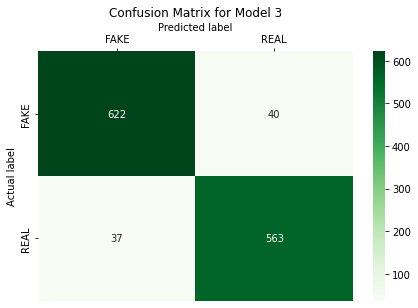

In [ ]:
#Confusion Matrix for Passive Aggressive Classifier
con_mtrx3 = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
print(con_mtrx3)
class_names=['FAKE','REAL'] 

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
sns.heatmap(pd.DataFrame(con_mtrx3), annot=True, cmap="Greens" ,fmt='g')
ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()
plt.tight_layout()
plt.title('Confusion Matrix for Model 3', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_ticklabels(['FAKE', 'REAL']);
ax.yaxis.set_ticklabels(['FAKE', 'REAL']);